In [1]:
# "standard" imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# 1. Upload Titanic dataset 

df = pd.read_csv('Titanic_original.csv')
# y = df['Survived'].map({0: 'no', 1: 'yes'})
y = df['Survived']
df = df.drop('Survived', axis=1)
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)
df = df.drop('Sex', axis=1)

df[['C', 'Q', 'S']] = pd.get_dummies(df['Embarked'])
df = df.drop('Embarked', axis = 1)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [3]:
# 2. Repeat Assignment 4

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
regrfe = LogisticRegression(solver='lbfgs', max_iter=10000)
regrfe.fit(df, y)
rfe = RFE(estimator=regrfe, n_features_to_select=5, step=1)
rfe.fit(df, y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [4]:
# now find top 3 features

# print summaries for the selection of attributes
print(df.columns)
print(rfe.support_)
print(rfe.ranking_)

# Based on the recursive feature selection ['Pclass', 'SibSb', 'Male', 'C', 'S'] are the significant columns
df = df[['Pclass', 'SibSp', 'Male', 'C', 'S']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=0)
reg = LogisticRegression(solver='lbfgs', max_iter=10000)
reg.fit(X_train, y_train)

# Compute your model’s accuracy using accuracy_score

y_pred = reg.predict(X_test)
print('Linear Regression Score')
print(reg.score(df,y))

coeff_df = DataFrame(zip(df.columns, np.transpose(reg.coef_)))
print(coeff_df)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn import metrics
print('Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred))

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Male', 'C', 'Q', 'S'], dtype='object')
[ True False  True False False  True  True False  True]
[1 4 1 2 5 1 1 3 1]
Linear Regression Score
0.792368125701459
        0                       1
0  Pclass   [-0.8348402126833802]
1   SibSp   [-0.2755466554907618]
2    Male    [-2.592075119000191]
3       C   [0.26562131659893856]
4       S  [-0.31441483594587694]
Confusion Matrix
[[152  32]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       184
           1       0.72      0.73      0.72       111

   micro avg       0.79      0.79      0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

Accuracy Score
0.7898305084745763


In [5]:
# 3. Use GridSearchCV to fit the logistic regression with a dictionary of values for C .
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=reg,
        param_grid={
            'C': [0.1, 0.5, 1, 10, 100, 1000]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

In [6]:
# 4. See what is the best value for the Hyperparameter, using the accuracy score

In [7]:
print(best_params)

{'C': 0.1}


In [8]:
grid_result.best_score_

-0.20302013422818793

In [9]:
from sklearn import metrics
print('Original Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred))

Original Accuracy Score
0.7898305084745763


In [10]:
reg2 = LogisticRegression(solver='lbfgs', C=0.1, max_iter=10000)
reg2.fit(X_train, y_train)

y_pred2 = reg2.predict(X_test)

print('Accuracy Score at C=0.1 ')
print(metrics.accuracy_score(y_test, y_pred2))

Accuracy Score at C=0.1 
0.8


In [11]:
# 5. Investigate the difference between L1 and L2 for the outcome. Is there a difference?

reg3 = LogisticRegression(solver='liblinear', C=0.1, max_iter=10000, penalty='l1')
reg3.fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)

print('Accuracy Score at C=0.1, L1')
print(metrics.accuracy_score(y_test, y_pred3))

reg4 = LogisticRegression(solver='liblinear', C=0.1, max_iter=10000, penalty='l2')
reg4.fit(X_train, y_train)
y_pred4 = reg4.predict(X_test)

print('Accuracy Score at C=0.1, L2')
print(metrics.accuracy_score(y_test, y_pred4))

Accuracy Score at C=0.1, L1
0.7864406779661017
Accuracy Score at C=0.1, L2
0.7864406779661017


In [12]:
# normal logistic reg - L2, lbgf - change solver to bilinear, 

reg5 = LogisticRegression(solver='lbfgs', C=0.1, max_iter=10000, penalty='l2')
reg5.fit(X_train, y_train)
y_pred5 = reg5.predict(X_test)

print('Accuracy Score at C=0.1, L2')
print(metrics.accuracy_score(y_test, y_pred5))

Accuracy Score at C=0.1, L2
0.8


In [13]:
# 6. Investigate the results of using different cross validation values 

In [14]:
for i in [2, 5, 10, 20]:
    gsc = GridSearchCV(
            estimator=reg,
            param_grid={
                'C': [0.1, 0.5, 1, 10, 100, 1000]
            },
            cv=i, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    reg = LogisticRegression(solver='lbfgs', C=best_params['C'], max_iter=10000)
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print('Accuracy Score at C= ', best_params)
    print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score at C=  {'C': 0.5}
0.7898305084745763
Accuracy Score at C=  {'C': 0.1}
0.8


C:\Sources\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy Score at C=  {'C': 0.1}
0.8
Accuracy Score at C=  {'C': 0.1}
0.8


C:\Sources\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
# 7.For the different investigation procedures, plot the accuracy outcome compared 
# to the different parameters. For example, Accuracy VS. the value of C. 

c_vs_acc = {}

for c in [0.1, 0.5, 1, 10, 100, 1000, 10000]:
    reg = LogisticRegression(solver='lbfgs', C=c, max_iter=10000)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    print('Accuracy Score at C= ', c)
    print(metrics.accuracy_score(y_test, y_pred))
    c_vs_acc[c] = metrics.accuracy_score(y_test, y_pred)

Accuracy Score at C=  0.1
0.8
Accuracy Score at C=  0.5
0.7898305084745763
Accuracy Score at C=  1
0.7898305084745763
Accuracy Score at C=  10
0.7898305084745763
Accuracy Score at C=  100
0.7898305084745763
Accuracy Score at C=  1000
0.7898305084745763
Accuracy Score at C=  10000
0.7898305084745763


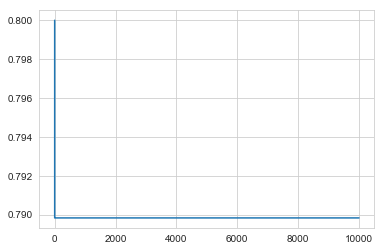

In [16]:
import matplotlib.pylab as plt

lists = sorted(c_vs_acc.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [17]:
# 8. Use Accuracy, Sensitivity, selectivity, and F1-score to assess the final performance of the chosen model.

In [18]:
reg = LogisticRegression(solver='lbfgs', C=0.1, max_iter=10000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

print(classification_report(y_test,y_pred))

print('Accuracy Score')
print(metrics.accuracy_score(y_test, y_pred))

print('f1 Score')
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

Confusion Matrix
[[159  25]
 [ 34  77]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       184
           1       0.75      0.69      0.72       111

   micro avg       0.80      0.80      0.80       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.80      0.80      0.80       295

Accuracy Score
0.8
f1 Score


0.7230046948356808